# A First Look at the Scraped Articles

In this report I'll show some exploratory data analysis and some descriptive statistics about the articles we scraped.
The sources we scraped are

* bloomberg.com
* nogger-noggersblog.blogspot.it
* world-grain.com
* euractiv.com
* agrimoney.com

These results are preliminary. More optimization on the spiders side could yield more data, but we have a considerable amount of raw text that we can start exploring while more work is allocated to refining the scraping machine.


In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
from matplotlib.path import Path

matplotlib.style.use('ggplot')

import math
import time
import datetime
import json

from pandas import DataFrame, Series
import pandas as pd
import numpy as np

The crawling machine runs quite efficiently and in a reasonable amount of time. If need be it can be re-run to adjust the target and complete in few hours.

In [25]:
finish_time = datetime.datetime(2016, 7, 8, 2, 8, 58, 168279)
start_time = datetime.datetime(2016, 7, 7, 22, 22, 38, 206003)
(finish_time - start_time).total_seconds() / 60 / 60

3.7722117433333335

Let's take a look at the data. From the scraped articles we stored the raw article content, the post title, the date, the source and the link (for potential further analysis).


In [3]:
version = "_07_07_2016"
with open('amis_articles{0}.jsonl'.format(version)) as f:
    articles = pd.DataFrame(json.loads(line) for line in f)

articles['date'] = pd.to_datetime(articles['date'])
articles['timestamp'] = articles['date']\
.apply(lambda d: time.mktime(d.timetuple()))
articles = articles.sort('date', ascending=1)

print "{0} Articles scraped\n".format(articles.title.count())

articles.head(5)

126602 Articles scraped



,article,date,link,source,title,timestamp
97990,Take a moment to reflect on the enormity of th...,1991-09-01,http://www.bloomberg.com/news/articles/1991-09...,bloomberg,The Lesson To Be Learned From Salomon - Bloomberg,683708400
78964,Step into a Kmart or Wal-Mart Store these days...,1998-03-01,http://www.bloomberg.com/news/articles/1998-03...,bloomberg,Cracks In The Diamond Trade - Bloomberg,888739200
113104,EurActiv.com 08/07/201...,1999-04-01,https://www.euractiv.com/section/agriculture-f...,euractiv,Commission preparing swift revolution for CAP ...,922953600
45678,EurActiv.com 07/07/201...,1999-04-01,http://www.euractiv.com/section/agriculture-fo...,euractiv,Commission preparing swift revolution for CAP ...,922953600
45668,EurActiv.com 07/07/201...,1999-12-21,http://www.euractiv.com/section/enlargement/ne...,euractiv,Nuclear safety should not be used as a pretext...,945763200


A natural starting point is to look at the number of articles and the timespan covered by each source. Some of the sources seem to be insufficiently covered. This is an issue that doesn't impact the amount of data significantly, but nonetheless we may want to address it in a second moment.

Articles spanning from 1991-09-01 00:00:00 to 2016-07-08 00:00:00

Source bloomberg: 40241 Articles:
 spanning from 1991-09-01 00:00:00 to 2016-07-08 00:00:00

Source euractiv: 68021 Articles:
 spanning from 1999-04-01 00:00:00 to 2016-07-07 00:00:00

Source noggers: 4796 Articles:
 spanning from 2001-01-12 00:01:00 to 2016-01-31 00:03:00

Source agrimoney: 9016 Articles:
 spanning from 2008-01-13 00:00:00 to 2016-07-08 00:00:00

Source worldgrain: 4528 Articles:
 spanning from 2010-07-01 00:00:00 to 2016-07-01 00:00:00



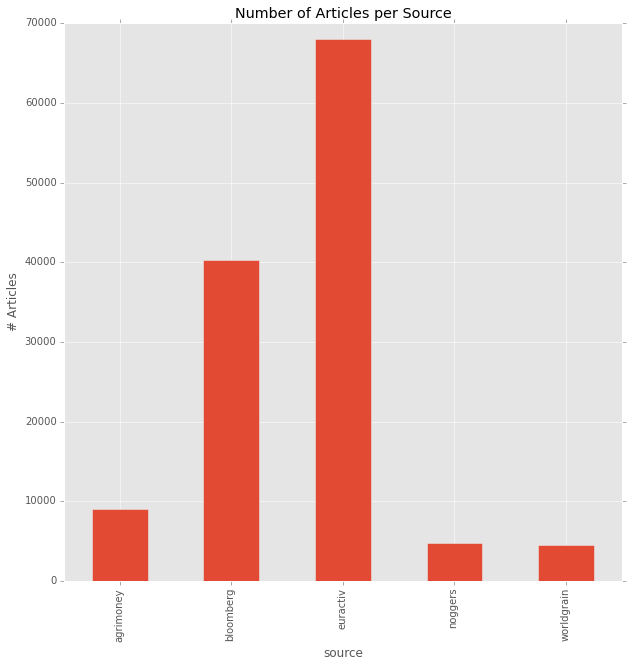

In [7]:
sources = list(articles['source'].unique())
counts_by_source = articles.groupby('source').title.count()
axh = counts_by_source.plot(kind='bar', figsize=(10, 10))
axh.set_title("Number of Articles per Source")
axh.set_ylabel("# Articles")

# timeframe (from when to when)
print "Articles spanning from {0} to {1}\n"\
.format(min(articles['date']), max(articles['date']))

for source in sources:
    print "Source {0}: {1} Articles:\n spanning from {2} to {3}\n".format(
        source, counts_by_source[source],
        min(articles[articles['source'] == source]['date']), 
        max(articles[articles['source'] == source]['date']))

Another descriptive statistic of interest is the article length by source. This is just a preliminary exploration since we will perform quite a few transforms on this text before we can run a model on it. Nothing really surprising here.

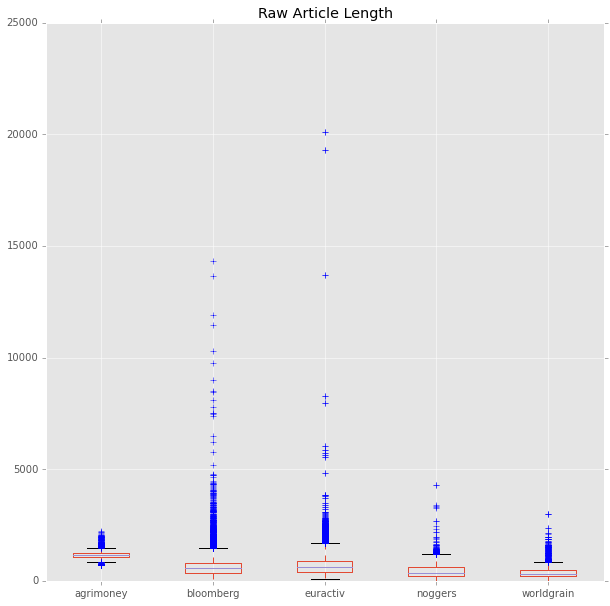

In [5]:
def article_length(x):
    if isinstance(x, basestring):
        return len(x.split(' '))
    else:
        return np.nan

plt.figure(figsize=(10, 10))
axh = articles.pivot(index='link', columns='source').article \
.apply(lambda art: [article_length(x) for x in art])\
.boxplot(return_type='axes')
c = axh.set_title("Raw Article Length")

Another important matter is the actual coverage of our data (and of each source). Recent years seem to be best covered, but Euractiv.com goes back quite a few years offering us the possibility to look back in time. If we want to use the source as a variable in our model we may have to constrain ourselves to recent years.

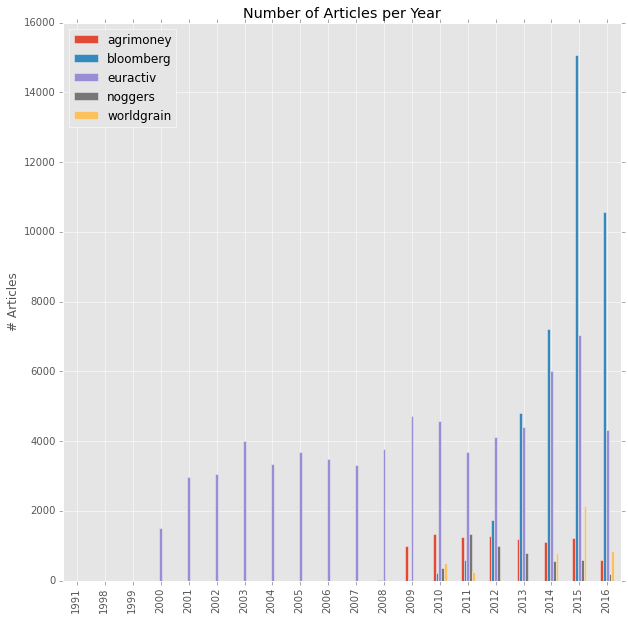

In [31]:
# count per year per source
counts_by_year = dict()
for source in sources:
    counts_by_year[source] = articles[articles['source'] == source]\
    .groupby(articles['date'].map(lambda t: t.year)).title.count()
axh = pd.DataFrame(counts_by_year).plot(kind='bar', figsize=(10, 10))
axh.legend(loc=2)
axh.set_title("Number of Articles per Year")
c = axh.set_ylabel("# Articles")

In conclusion the data seems OK to get started with the text processing and sentiment modeling.
Issues left to explore are:

* Scraping the commodity prices
* Processing the text
* Building a sentiment Index
* Building few predictive models to link sentiment and prices
* More efficient scrapers (i.e. more data)
* Scraping more sources

The last two can be put on the backburner and addressed when time allows, i.e. when a preliminary model has been sketched. 